In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,NaN,S


In [27]:
#check for null values in the dataset
df.isnull().sum()

#check the variables types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          713 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Statistics for numerical attributes in the dataset
print(df[['Age', 'Fare', 'SibSp']].describe())

              Age        Fare       SibSp
count  713.000000  891.000000  891.000000
mean    30.367700   32.204208    0.523008
std     25.241638   49.693429    1.102743
min      0.000000    0.000000    0.000000
25%     20.000000    7.910400    0.000000
50%     28.000000   14.454200    0.000000
75%     38.000000   31.000000    1.000000
max    580.000000  512.329200    8.000000


**Univariate Analysis:**

1.Numerical Variables: analyzing the numerical variables: 'Age', 'Fare', and 'SibSp'

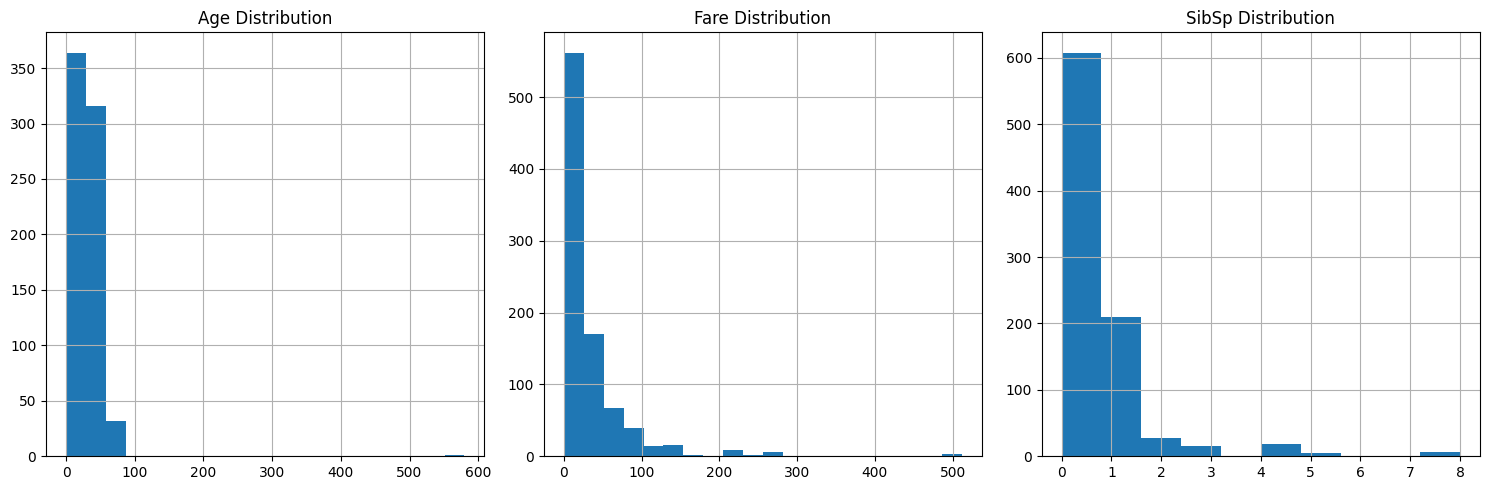

In [29]:
# Histograms for the numerical attributes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['Age'].hist(ax=axes[0], bins=20)
axes[0].set_title('Age Distribution')
df['Fare'].hist(ax=axes[1], bins=20)
axes[1].set_title('Fare Distribution')
df['SibSp'].hist(ax=axes[2], bins=10)
axes[2].set_title('SibSp Distribution')
plt.tight_layout()
plt.show()

2.Categorical Variables:examine the categorical variables: 'Survived', 'Pclass', 'Sex', and 'Embarked'.

In [30]:
# Value counts for categorical variables
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))


Survived value counts:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Pclass value counts:
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Sex value counts:
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Embarked value counts:
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


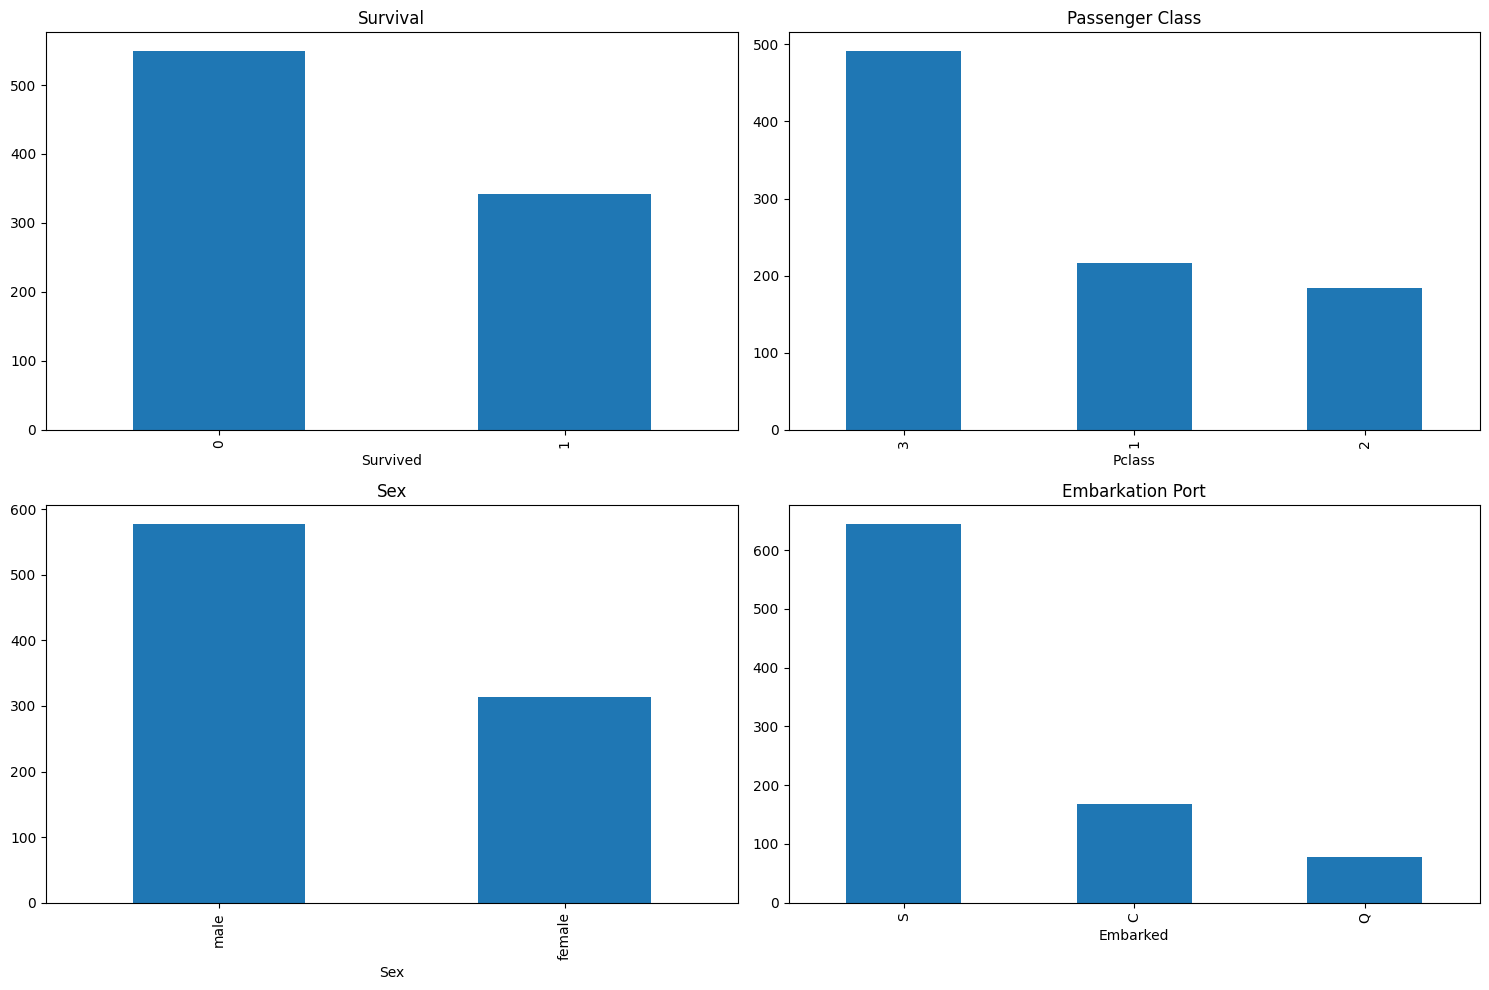

In [31]:
# Bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df['Survived'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Survival')
df['Pclass'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Passenger Class')
df['Sex'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Sex')
df['Embarked'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Embarkation Port')
plt.tight_layout()
plt.show()

**Multivariate Analysis:**

1.Correlation between numerical variables:

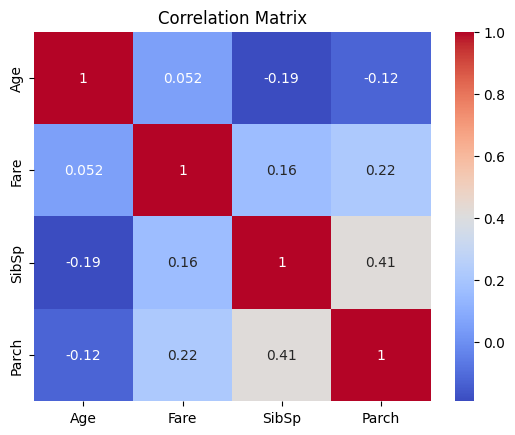

In [32]:
# Correlation matrix
corr_matrix = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2.Survival rate by different categorical variables:

In [33]:
# Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [34]:
# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


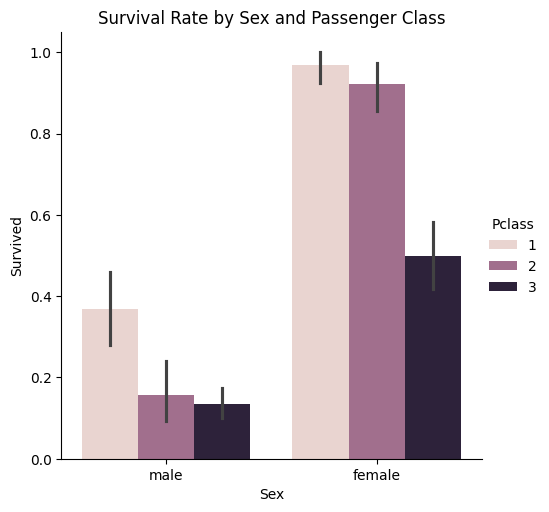

In [35]:
# Visualize survival rate by Sex and Pclass
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='bar', data=df)
plt.title('Survival Rate by Sex and Passenger Class')
plt.show()

3.Age distribution across Pclass and Sex:



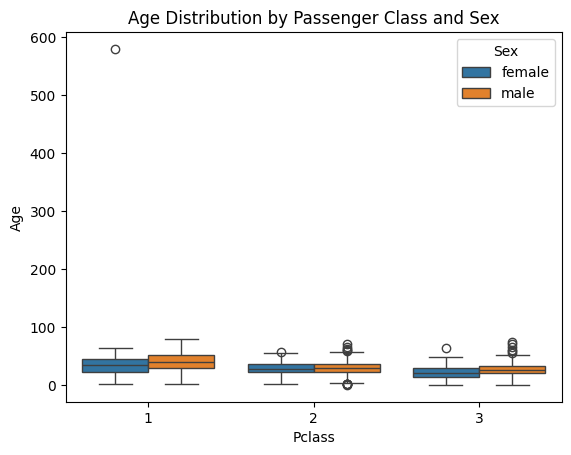

In [36]:
# Box plot of Age by Pclass and Sex
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Passenger Class and Sex')
plt.show()

4.Fare distribution across Pclass and Survived:

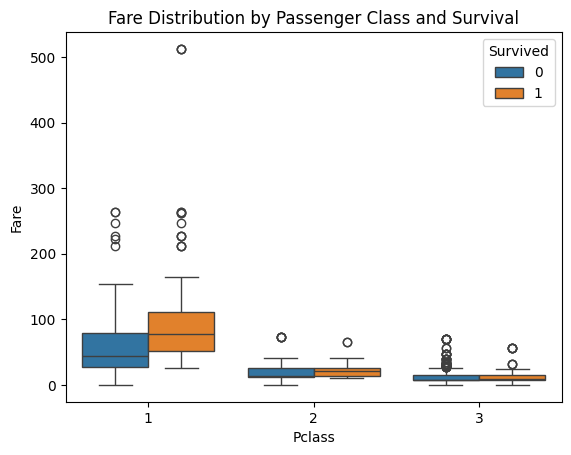

In [37]:
# Box plot of Fare by Pclass and Survived
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

In [38]:
#Fill missing ages with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\traj6\AppData\Local\Temp\ipykernel_17816\573366258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [39]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])


In [40]:
# Calculate survival rate by age group
survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)
print("Survival Rate by Age Group:")
print(survival_rate_by_age)

Survival Rate by Age Group:
AgeGroup
Child          0.507246
Adult          0.398693
Young Adult    0.352060
Senior         0.333333
Name: Survived, dtype: float64


C:\Users\traj6\AppData\Local\Temp\ipykernel_17816\1147091792.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)


In [41]:
# Calculate average fare by passenger class
average_fare_by_class = df.groupby('Pclass')['Fare'].mean().sort_values(ascending=False)
print("\nAverage Fare by Passenger Class:")
print(average_fare_by_class)


Average Fare by Passenger Class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [42]:
# Find the most common embarkation port for each passenger class
most_common_port_by_class = df.groupby('Pclass')['Embarked'].agg(lambda x: x.value_counts().index[0])
print("\nMost Common Embarkation Port by Passenger Class:")
print(most_common_port_by_class)


Most Common Embarkation Port by Passenger Class:
Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object


In [43]:
# Calculate the percentage of survivors for passengers traveling alone vs with family
df['HasFamily'] = np.where((df['SibSp'] + df['Parch']) > 0, 1, 0)
survival_rate_family = df.groupby('HasFamily')['Survived'].mean()
print("\nSurvival Rate for Passengers with/without Family:")
print(survival_rate_family)


Survival Rate for Passengers with/without Family:
HasFamily
0    0.303538
1    0.505650
Name: Survived, dtype: float64


In [44]:
# Use numpy to calculate the correlation between age and fare
age_fare_correlation = np.corrcoef(df['Age'], df['Fare'])[0, 1]
print(f"\nCorrelation between Age and Fare: {age_fare_correlation:.2f}")


Correlation between Age and Fare: 0.05
